### Gradient Descent and Optimisation Techniques

## Advanced Optimisation Techniques

### Adagrad
Adagrad adapts the learning rate for each parameter by scaling it inversely with the sum of the squares of all previous gradients. This allows for larger updates for infrequent parameters and smaller updates for frequent ones, making it particularly useful for sparse data.

### RMSprop
RMSprop modifies Adagrad by using an exponentially weighted moving average of the squared gradients, rather than a cumulative sum. This prevents the learning rate from decreasing too quickly and helps maintain a steady pace of learning, making it effective for non-stationary objectives and recurrent neural networks (RNNs).

### Adam (Adaptive Moment Estimation)
Adam combines the benefits of momentum and RMSprop. It computes adaptive learning rates for each parameter by estimating both the first moment (mean) and the second moment (uncentred variance) of the gradients. Adam generally performs well across a wide range of tasks and is robust to noisy data and sparse gradients.

---

## Importance of Learning Rate and Choosing the Right Optimiser

### Learning Rate
The learning rate determines the step size for parameter updates during optimisation. If the learning rate is too high, the algorithm may overshoot the minimum or even diverge. If it is too low, convergence will be slow and may get stuck in local minima. Careful tuning of the learning rate is crucial for effective training.

### Choosing the Right Optimiser

- **SGD (Stochastic Gradient Descent):** Works well for simple, convex problems and is easy to implement. However, it may struggle with complex, non-convex landscapes.
- **Adam:** Generally performs well across a variety of tasks and is often the default choice for many deep learning applications.
- **RMSprop:** Often preferred for RNNs and sequence-based tasks due to its ability to handle non-stationary objectives.

> **Note:** The choice of optimiser and learning rate can significantly impact model performance. It is recommended to experiment with different settings and use validation data to guide selection.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

generate data

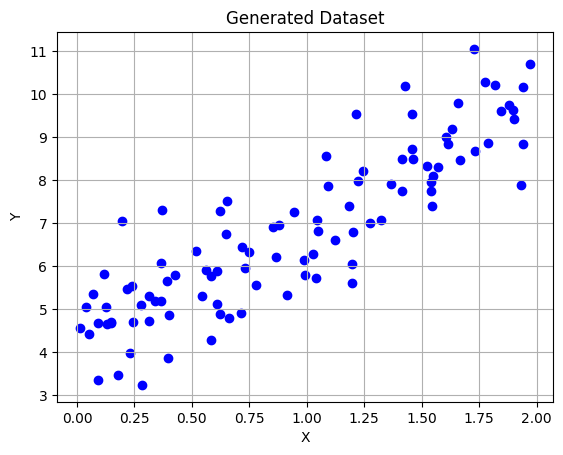

In [41]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# visualise data
plt.scatter(X, y, color="blue")
plt.title("Generated Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

Intialise Parameters

In [42]:
m = 100
theta = np.random.rand(2,1)
learning_rate = 0.1
iterations = 1000 

# add bias term to X
X_b = np.c_[np.ones((m,1)),X]

# gradient descent
for iteration in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

print("Optimised parameters (Thera): \n", theta)

Optimised parameters (Thera): 
 [[4.21509616]
 [2.77011339]]


In [43]:
import tensorflow as tf
#  prepare data
X_tensor = tf.constant(X,dtype = tf.float32)
y_tensor = tf.constant(X,dtype = tf.float32)

# define model
class LinearModel(tf.Module):
    def __init__(self):
        self.weights = tf.Variable(tf.random.normal([1]))
        self.bias = tf.Variable(tf.random.normal([1]))

    def __call__(self,X):
        return self.weights * X + self.bias
    
# define loss function 
def mse_loss(y_true, y_predict):
    return tf.reduce_mean(tf.square(y_true - y_predict))

# train with sgd
model = LinearModel()
optimizer = tf.optimizers.SGD(learning_rate=0.1)

for epoch in range(100):
    with tf.GradientTape() as tape:
        y_pred  = model(X_tensor)
        loss = mse_loss(y_tensor, y_pred)
    gradients = tape.gradient(loss,[model.weights, model.bias])
    optimizer.apply_gradients(zip(gradients,[model.weights,model.bias]))
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")


Epoch 0, Loss: 20.7297
Epoch 10, Loss: 0.0914
Epoch 20, Loss: 0.0456
Epoch 30, Loss: 0.0228
Epoch 40, Loss: 0.0115
Epoch 50, Loss: 0.0057
Epoch 60, Loss: 0.0029
Epoch 70, Loss: 0.0014
Epoch 80, Loss: 0.0007
Epoch 90, Loss: 0.0004


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# prepare data
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)


# define model
class LinearModelTorch(nn.Module):
    def __init__(self):
        super(LinearModelTorch, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model_torch = LinearModelTorch()

# define loss function and optimiser
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.1)

# train model
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model_torch(X_torch)
    loss = criterion(outputs, y_torch)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 50.9241
Epoch 10, Loss: 26.7393
Epoch 20, Loss: 11.5185
Epoch 30, Loss: 4.1030
Epoch 40, Loss: 1.7010
Epoch 50, Loss: 1.3634
Epoch 60, Loss: 1.3771
Epoch 70, Loss: 1.3066
Epoch 80, Loss: 1.2137
Epoch 90, Loss: 1.1507
